In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import platform

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [3]:
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Monthly

In [4]:
if platform.system() == 'Windows':
  pm10_monthly = pd.read_csv("..\\Data for model\\o3_meteorolgical_monthly.csv")
elif platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/gdrive')
  pm10_monthly = pd.read_csv("/content/gdrive/Othercomputers/My Laptop (1)/jkt-aqi-forecasting/Model/Data for Model/o3_meteorolgical_monthly.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## O3

In [5]:
o3_monthly

,tanggal,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
0,2010-01-31,41.9,42,4.7,5,2372.3,30,51.0,22,21.8,14,27.4,80.2,14.4,2.5
1,2010-02-28,56.2,53,6.0,7,2825.5,36,97.1,41,28.7,19,28.2,80.3,9.6,2.6
2,2010-03-31,59.3,55,8.0,9,2897.4,36,101.1,42,29.2,19,28.6,78.5,9.4,2.6
3,2010-04-30,59.5,55,12.4,13,2720.0,34,118.3,49,27.1,18,29.6,74.5,2.2,2.7
4,2010-05-31,65.2,58,16.3,16,2907.7,37,124.3,52,31.1,20,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019-08-31,68.8,59,19.7,20,1680.0,22,143.1,60,25.3,16,28.3,68.8,0.0,1.4
116,2019-09-30,64.3,57,21.6,21,1523.2,20,140.4,59,22.5,15,28.8,68.9,0.0,1.2
117,2019-10-31,73.4,62,21.6,21,1540.0,20,159.5,67,23.6,15,29.5,70.0,0.0,1.2
118,2019-11-30,65.6,58,23.5,23,1363.2,18,162.7,69,24.0,16,29.5,70.8,2.0,1.3


In [6]:
o3_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tanggal                         120 non-null    object 
 1   pm10(ug/m3)                     120 non-null    float64
 2   pm10_ispu                       120 non-null    int64  
 3   so2(ug/m3)                      120 non-null    float64
 4   so2_ispu                        120 non-null    int64  
 5   co(ug/m3)                       120 non-null    float64
 6   co_ispu                         120 non-null    int64  
 7   o3(ug/m3)                       120 non-null    float64
 8   o3_ispu                         120 non-null    int64  
 9   no2(ug/m3)                      120 non-null    float64
 10  no2_ispu                        120 non-null    int64  
 11  temperatur_rata-rata(°C)        120 non-null    float64
 12  kelembapan_rata-rata(%)         120 

In [7]:
o3_monthly['tanggal'] = pd.to_datetime(o3_monthly['tanggal'], dayfirst=True)
o3_monthly.set_index('tanggal', inplace=True)

In [8]:
o3_monthly.describe()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.696667,53.766667,17.369167,17.350000,2140.963333,27.225000,123.872500,52.133333,20.342500,13.441667,28.484167,75.831667,5.907500,1.881667
std,14.937353,9.465313,9.064084,8.516568,458.311636,5.590301,40.796987,17.162071,10.281407,6.340209,0.658365,4.315148,5.617263,0.680457
min,28.400000,29.000000,1.600000,3.000000,1150.500000,15.000000,31.100000,14.000000,2.700000,3.000000,26.600000,66.300000,0.000000,0.900000
25%,50.250000,50.000000,9.000000,9.000000,1772.150000,23.000000,95.125000,40.000000,7.500000,5.750000,28.175000,72.750000,1.800000,1.300000
50%,59.450000,55.000000,16.850000,17.000000,2168.800000,27.500000,126.200000,52.500000,24.050000,16.000000,28.600000,76.300000,5.050000,1.600000
75%,70.500000,60.250000,23.075000,23.000000,2529.600000,32.000000,156.550000,66.000000,28.925000,19.000000,28.900000,78.600000,8.525000,2.600000
max,103.200000,77.000000,40.800000,39.000000,3062.400000,39.000000,203.900000,86.000000,37.500000,24.000000,29.900000,84.800000,33.000000,3.300000


In [9]:
o3_monthly.corr(method='spearman')

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.998846,0.073242,0.066274,0.217009,0.214419,0.320464,0.323119,0.506270,0.496773,0.337487,-0.365542,-0.457840,-0.117375
pm10_ispu,0.998846,1.000000,0.077028,0.070341,0.217985,0.215218,0.318720,0.321275,0.500334,0.491054,0.337593,-0.359719,-0.450833,-0.118786
so2(ug/m3),0.073242,0.077028,1.000000,0.998928,-0.111072,-0.105254,-0.053265,-0.049911,-0.151968,-0.145419,0.141579,-0.234168,-0.149000,-0.087005
so2_ispu,0.066274,0.070341,0.998928,1.000000,-0.105754,-0.099560,-0.061366,-0.058153,-0.151439,-0.145055,0.137976,-0.227800,-0.139096,-0.082798
co(ug/m3),0.217009,0.217985,-0.111072,-0.105754,1.000000,0.998476,0.213741,0.212842,0.474615,0.480847,-0.105411,0.360797,0.340931,0.460545
co_ispu,0.214419,0.215218,-0.105254,-0.099560,0.998476,1.000000,0.210402,0.209816,0.473710,0.480386,-0.107821,0.362407,0.341291,0.457511
o3(ug/m3),0.320464,0.318720,-0.053265,-0.061366,0.213741,0.210402,1.000000,0.999715,0.457211,0.452113,0.314346,-0.331460,-0.274015,0.319836
o3_ispu,0.323119,0.321275,-0.049911,-0.058153,0.212842,0.209816,0.999715,1.000000,0.458917,0.454162,0.314866,-0.331565,-0.275958,0.316290
no2(ug/m3),0.506270,0.500334,-0.151968,-0.151439,0.474615,0.473710,0.457211,0.458917,1.000000,0.995838,0.260025,-0.250964,-0.261007,0.344120
no2_ispu,0.496773,0.491054,-0.145419,-0.145055,0.480847,0.480386,0.452113,0.454162,0.995838,1.000000,0.255304,-0.240835,-0.250228,0.345154


In [10]:
o3_monthly.drop(['pm10_ispu', 'so2(ug/m3)', 'so2_ispu', 'co_ispu', 'o3_ispu', 'no2_ispu'], axis=1, inplace=True)
first_column = o3_monthly.pop('o3(ug/m3)')
o3_monthly.insert(0, 'o3(ug/m3)', first_column)

### Visualize

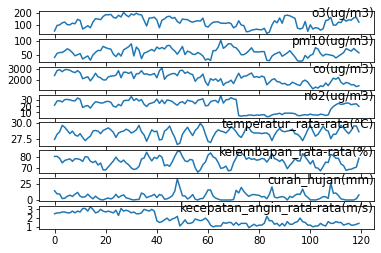

In [11]:
groups = [i for i in range(len(o3_monthly.columns))]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(o3_monthly.values[:, group])
    plt.title(o3_monthly.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Sliding Window

In [12]:
WINDOW_SIZE = 12
FEATURES = o3_monthly.shape[1]

# convert series to supervised learning
def series_to_supervised(index, data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.index = index
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
values = o3_monthly.values
# frame as supervised learning
reframed = series_to_supervised(o3_monthly.index, values, WINDOW_SIZE)
# drop columns we don't want to predict
reframed = reframed.iloc[:, :-1*(FEATURES-1)]
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var8(t-12),var1(t-11),var2(t-11),...,var8(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,,,
2011-01-31,51.0,41.9,2372.3,21.8,27.4,80.2,14.4,2.5,97.1,56.2,...,2.7,67.8,36.0,2077.2,17.8,27.7,75.8,4.3,3.1,79.6
2011-02-28,97.1,56.2,2825.5,28.7,28.2,80.3,9.6,2.6,101.1,59.3,...,3.1,79.6,42.2,2176.7,20.4,27.2,80.0,5.1,3.1,94.6
2011-03-31,101.1,59.3,2897.4,29.2,28.6,78.5,9.4,2.6,118.3,59.5,...,3.1,94.6,47.0,2256.0,21.1,27.6,79.6,9.1,2.8,77.6
2011-04-30,118.3,59.5,2720.0,27.1,29.6,74.5,2.2,2.7,124.3,65.2,...,2.8,77.6,31.9,1889.7,16.9,27.9,76.0,5.1,3.3,123.9
2011-05-31,124.3,65.2,2907.7,31.1,29.3,76.7,2.8,2.7,102.4,72.6,...,3.3,123.9,50.4,2186.7,22.8,28.7,74.8,1.8,3.0,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,74.8,71.7,1229.3,5.3,28.2,69.9,1.1,1.1,58.3,55.3,...,1.2,131.7,73.2,1741.5,25.3,28.7,67.9,0.0,1.3,143.1
2019-09-30,58.3,55.3,1440.0,6.9,28.8,67.5,2.7,1.4,69.8,46.9,...,1.3,143.1,68.8,1680.0,25.3,28.3,68.8,0.0,1.4,140.4
2019-10-31,69.8,46.9,1373.3,6.2,29.5,71.3,5.3,1.2,136.2,53.0,...,1.4,140.4,64.3,1523.2,22.5,28.8,68.9,0.0,1.2,159.5


In [13]:
from sklearn.preprocessing import MinMaxScaler

# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
reframed = pd.DataFrame(scaler.fit_transform(reframed), index=reframed.index, columns=reframed.columns)
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var8(t-12),var1(t-11),var2(t-11),...,var8(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.115162,0.180481,0.639050,0.548851,0.242424,0.751351,0.436364,0.666667,0.381944,0.371658,...,0.750000,0.212384,0.101604,0.484701,0.433908,0.333333,0.513514,0.130303,0.916667,0.280671
2011-02-28,0.381944,0.371658,0.876092,0.747126,0.484848,0.756757,0.290909,0.708333,0.405093,0.413102,...,0.916667,0.280671,0.184492,0.536744,0.508621,0.181818,0.740541,0.154545,0.916667,0.367477
2011-03-31,0.405093,0.413102,0.913698,0.761494,0.606061,0.659459,0.284848,0.708333,0.504630,0.415775,...,0.916667,0.367477,0.248663,0.578221,0.528736,0.303030,0.718919,0.275758,0.791667,0.269097
2011-04-30,0.504630,0.415775,0.820911,0.701149,0.909091,0.443243,0.066667,0.750000,0.539352,0.491979,...,0.791667,0.269097,0.046791,0.386631,0.408046,0.393939,0.524324,0.154545,1.000000,0.537037
2011-05-31,0.539352,0.491979,0.919086,0.816092,0.818182,0.562162,0.084848,0.750000,0.412616,0.590909,...,1.000000,0.537037,0.294118,0.541974,0.577586,0.636364,0.459459,0.054545,0.875000,0.705440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.252894,0.578877,0.041216,0.074713,0.484848,0.194595,0.033333,0.083333,0.157407,0.359626,...,0.125000,0.582176,0.598930,0.309117,0.649425,0.636364,0.086486,0.000000,0.166667,0.648148
2019-09-30,0.157407,0.359626,0.151420,0.120690,0.666667,0.064865,0.081818,0.208333,0.223958,0.247326,...,0.166667,0.648148,0.540107,0.276950,0.649425,0.515152,0.135135,0.000000,0.208333,0.632523
2019-10-31,0.223958,0.247326,0.116533,0.100575,0.878788,0.270270,0.160606,0.125000,0.608218,0.328877,...,0.208333,0.632523,0.479947,0.194937,0.568966,0.666667,0.140541,0.000000,0.125000,0.743056


In [14]:
from datetime import datetime

train_end = datetime.strptime('2011-12-31', '%Y-%m-%d')
test_start = datetime.strptime('2012-01-01', '%Y-%m-%d')
test_end = datetime.strptime('2019-12-31', '%Y-%m-%d')

train = reframed.loc[:train_end].values
test = reframed.loc[test_start:test_end].values
train_X, train_y = train[:, :-1], train[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(12, 96) (12, 1) (96, 96) (96, 1)


In [15]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], WINDOW_SIZE, FEATURES))
# val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], WINDOW_SIZE, FEATURES))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(12, 12, 8) (12, 1) (96, 12, 8) (96, 1)


In [16]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed
import keras_tuner as kt

set_seed(
    1337
)

'''# design network
model = Sequential()
model.add(InputLayer((train_X.shape[1], train_X.shape[2])))
model.add(LSTM(6))
model.add(Dense(1))
model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=RootMeanSquaredError())
# fit network
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=24)
history = model.fit(train_X, train_y, epochs=175, batch_size=24, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()'''
def call_existing_code(units, activation, dropout, dropout_rate, lr):
    model = Sequential()
    model.add(InputLayer((train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(units=units))
    if dropout:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1, activation=activation))
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=Huber(),
        metrics=RootMeanSquaredError(),
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    activation = hp.Choice("activation", ["relu", "tanh", "linear"])
    dropout = hp.Boolean("dropout")
    dropout_rate = hp.Float("dropout_1", min_value=0.1, max_value=0.2, step=0.1)
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, default=1e-3)
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, dropout_rate=dropout_rate, lr=lr
    )
    return model


build_model(kt.HyperParameters())

In [18]:
class MyTuner(kt.tuners.BayesianOptimization):
    def run_trial(self, trial, *args, **kwargs):
        # You can add additional HyperParameters for preprocessing and custom training loops
        # via overriding `run_trial`
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', min_value=1, max_value=60, step=1)
        kwargs['epochs'] = trial.hyperparameters.Int('epochs', min_value=1, max_value=500, step=1)
        return super(MyTuner, self).run_trial(trial, *args, **kwargs)

if platform.system() == 'Windows':
  tuner = MyTuner(
    hypermodel=build_model,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=100,
    executions_per_trial=1,
    overwrite=False,
    directory="D:\\From External Drive\\Kuliah\\Tugas Akhir\\undergraduate-thesis_2.0\\data-and-model\\Model_2",
    project_name="lstm_o3_monthly_80-20_result"
  )
elif platform.system() == 'Linux':
  tuner = MyTuner(
    hypermodel=build_model,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=100,
    executions_per_trial=1,
    overwrite=False,
    directory="/content/gdrive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model_2",
    project_name="lstm_o3_monthly_80-20_result"
  )

tuner.search(x=train_X, y=train_y, validation_data=(test_X, test_y), shuffle=False)

In [19]:
tuner.results_summary()

Results summary
Results in /content/gdrive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model_2/lstm_o3_monthly_80-20_result
Showing 10 best trials
Trial summary
Hyperparameters:
units: 100
activation: linear
dropout: False
dropout_1: 0.2
lr: 0.007966535850078213
batch_size: 1
epochs: 500
Score: 0.11104452610015869
Trial summary
Hyperparameters:
units: 100
activation: linear
dropout: False
dropout_1: 0.2
lr: 0.007907748093578889
batch_size: 1
epochs: 500
Score: 0.11798522621393204
Trial summary
Hyperparameters:
units: 100
activation: linear
dropout: False
dropout_1: 0.2
lr: 0.00819358161919406
batch_size: 1
epochs: 500
Score: 0.12699131667613983
Trial summary
Hyperparameters:
units: 100
activation: linear
dropout: False
dropout_1: 0.2
lr: 0.008292494003023738
batch_size: 1
epochs: 500
Score: 0.13325656950473785
Trial summary
Hyperparameters:
units: 100
activation: linear
dropout: False
dropout_1: 0.2
lr: 0.007999383925499218
batch_size: 1
epochs: 500
Score: 0.13

In [20]:
# Get the top 2 models.
best_model = tuner.get_best_models(num_models=1)[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=((train_X.shape[1], train_X.shape[2])))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43,701
Trainable params: 43,701
Non-trainable params: 0
_________________________________________________________________


In [21]:
best_model.evaluate(test_X, test_y)

3/3 [==============================] - 1s 7ms/step - loss: 0.0039 - root_mean_squared_error: 0.0881


[0.0038794439751654863, 0.08808454871177673]

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_hp = tuner.get_best_hyperparameters(10)[0]
best_model = build_model(best_hp)
best_model.fit(x=train_X, y=train_y, validation_data=(test_X, test_y), epochs=85, batch_size=1, shuffle=False)

Epoch 1/85
12/12 [==============================] - 3s 96ms/step - loss: 0.1351 - root_mean_squared_error: 0.5223 - val_loss: 0.1153 - val_root_mean_squared_error: 0.4801
Epoch 2/85
12/12 [==============================] - 1s 70ms/step - loss: 0.1101 - root_mean_squared_error: 0.4694 - val_loss: 0.0321 - val_root_mean_squared_error: 0.2533
Epoch 3/85
12/12 [==============================] - 1s 74ms/step - loss: 0.0062 - root_mean_squared_error: 0.1113 - val_loss: 0.0574 - val_root_mean_squared_error: 0.3390
Epoch 4/85
12/12 [==============================] - 1s 69ms/step - loss: 0.0339 - root_mean_squared_error: 0.2602 - val_loss: 0.0202 - val_root_mean_squared_error: 0.2008
Epoch 5/85
12/12 [==============================] - 1s 75ms/step - loss: 0.0087 - root_mean_squared_error: 0.1319 - val_loss: 0.0255 - val_root_mean_squared_error: 0.2258
Epoch 6/85
12/12 [==============================] - 1s 72ms/step - loss: 0.0110 - root_mean_squared_error: 0.1481 - val_loss: 0.0227 - val_root_m

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
  
# make a prediction
yhat = best_model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1]*train_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, train_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_y = np.concatenate((train_y, train_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Train R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Train RMSE: {rmse:.3f}')
print(f'Train MAPE: {mape(inv_y, inv_yhat):.3f}%')

1/1 [==============================] - 1s 562ms/step
Train R-Squared: 96.996%
Train RMSE: 6.667
Train MAPE: 4.476%


In [24]:
train_result = pd.DataFrame({'train_actual': inv_y, 'train_pred': inv_yhat}, index=reframed.loc[:train_end].index)
train_result

,train_actual,train_pred
tanggal,,
2011-01-31,79.6,86.760474
2011-02-28,94.6,101.873481
2011-03-31,77.6,83.832727
2011-04-30,123.9,126.663061
2011-05-31,153.0,162.186553
2011-06-30,148.9,150.776215
2011-07-31,144.7,156.977798
2011-08-31,170.4,168.680658
2011-09-30,185.3,184.421972


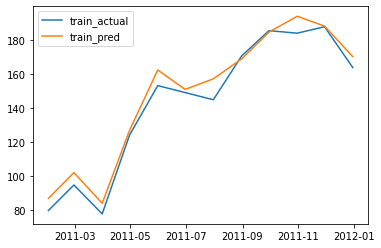

In [25]:
plt.plot(train_result['train_actual'], label='train_actual')
plt.plot(train_result['train_pred'], label='train_pred')
plt.legend()
plt.show()

In [26]:
# make a prediction
yhat = best_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Test R-Squared: {round(r2_score(inv_y, inv_yhat) * 100, 2)}%')
print(f'Test RMSE: {round(rmse, 2)}')
print(f'Test MAPE: {round(mape(inv_y, inv_yhat), 2)}%')

3/3 [==============================] - 0s 8ms/step
Test R-Squared: -22.31%
Test RMSE: 45.77
Test MAPE: 35.9%


In [27]:
result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[test_start:test_end].index)

In [28]:
rmse_each_month = []
for index, value in result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
result['rmse'] = rmse_each_month

In [29]:
mape_each_month = []
for index, value in result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
result['mape'] = mape_each_month

In [30]:
result

,actual,pred,rmse,mape
tanggal,,,,
2012-01-31,156.7,128.712585,27.99,17.86%
2012-02-29,180.3,98.009550,82.29,45.64%
2012-03-31,166.4,137.402952,29.00,17.43%
2012-04-30,203.9,135.881401,68.02,33.36%
2012-05-31,181.5,164.757900,16.74,9.22%
...,...,...,...,...
2019-08-31,143.1,148.564358,5.46,3.82%
2019-09-30,140.4,149.692070,9.29,6.62%
2019-10-31,159.5,142.567100,16.93,10.62%


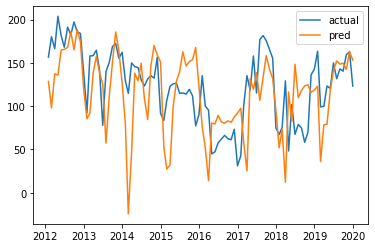

In [31]:
plt.plot(result['actual'], label='actual')
plt.plot(result['pred'], label='pred')
plt.legend()
plt.show()